In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
dirname = "/home/daniela/git/analyzing-corpora/data/data/enron_out_0.1/"

In [3]:

from corpora.scikit import ScikitLda

import os
import zlib
import numpy
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
from scipy import sparse
topics = []
for subdir in [x[0] for x in os.walk(dirname)][1:]:
    for filename in os.listdir(subdir):
        if filename.endswith('pkl'):
            print("attempting... ", filename)
            lda = ScikitLda.load(subdir+"/"+filename)
            for topic in lda.topics:
                topics.append(topic / topic.sum())

('attempting... ', 'lda_87.pkl')
('attempting... ', 'lda_3.pkl')
('attempting... ', 'lda_20.pkl')
('attempting... ', 'lda_100.pkl')
('attempting... ', 'lda_4.pkl')
('attempting... ', 'lda_43.pkl')
('attempting... ', 'lda_63.pkl')
('attempting... ', 'lda_34.pkl')
('attempting... ', 'lda_74.pkl')
('attempting... ', 'lda_7.pkl')
('attempting... ', 'lda_52.pkl')
('attempting... ', 'lda_27.pkl')
('attempting... ', 'lda_15.pkl')


In [4]:
topics

[array([  1.56543402e-09,   1.56543402e-09,   1.56543402e-09, ...,
          1.56543402e-09,   1.56543402e-09,   1.56543402e-09]),
 array([  2.26854583e-07,   2.26854583e-07,   2.26854583e-07, ...,
          2.26854583e-07,   2.26854583e-07,   2.26854583e-07]),
 array([  3.01134467e-08,   3.01134467e-08,   3.01134467e-08, ...,
          3.01134467e-08,   3.01134467e-08,   3.01134467e-08]),
 array([  4.71741237e-08,   4.71741237e-08,   4.71741237e-08, ...,
          4.71741237e-08,   4.71741237e-08,   4.71741237e-08]),
 array([  5.03724032e-09,   5.03724032e-09,   5.03724032e-09, ...,
          5.03724032e-09,   5.03724032e-09,   5.03724032e-09]),
 array([  6.30511418e-09,   6.30511418e-09,   6.30511418e-09, ...,
          6.30511418e-09,   6.30511418e-09,   6.30511418e-09]),
 array([  8.86065597e-08,   8.86065597e-08,   8.86065597e-08, ...,
          8.86065597e-08,   8.86065597e-08,   8.86065597e-08]),
 array([  3.00552207e-08,   3.00552207e-08,   3.00552207e-08, ...,
          3.0055

In [5]:
'''
The first step is convert the similarity matrix into distance matrix(=dist_matrix). 
Note: more similar the item, lesser is their distance.
'''
cos_distance = pairwise_distances(topics, metric='cosine')

In [6]:
cos_distance

array([[  7.73603404e-13,   9.99980031e-01,   9.93270756e-01, ...,
          9.93294338e-01,   9.94183725e-01,   9.21961588e-01],
       [  9.99980031e-01,  -1.40065737e-12,   9.99996223e-01, ...,
          9.98381465e-01,   9.99965391e-01,   9.98948422e-01],
       [  9.93270756e-01,   9.99996223e-01,   7.12796489e-12, ...,
          6.82165117e-01,   9.99851339e-01,   9.22496272e-01],
       ..., 
       [  9.93294338e-01,   9.98381465e-01,   6.82165117e-01, ...,
         -2.27773356e-12,   9.98406192e-01,   8.49138435e-01],
       [  9.94183725e-01,   9.99965391e-01,   9.99851339e-01, ...,
          9.98406192e-01,   4.53770355e-12,   9.99725539e-01],
       [  9.21961588e-01,   9.98948422e-01,   9.22496272e-01, ...,
          8.49138435e-01,   9.99725539e-01,   4.86455320e-12]])

In [7]:
len(topics)  # number of topics

529

In [8]:
from sklearn import manifold

In [9]:
from sklearn.manifold import MDS 
MDS() 
# pick number of components=2 so that we can plot on 2-space., random_state is chosen so that we can re-produce. 
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1) 
pos = mds.fit_transform(cos_distance) # shape (n_components, n_samples) 
xs, ys = pos[:, 0], pos[:, 1]

In [10]:
len(pos) # good

529

In [11]:
import matplotlib.pyplot as plt

In [12]:
from sklearn.cluster import KMeans
k_fit = KMeans(n_clusters=25).fit_predict(cos_distance)

/home/daniela/anaconda/envs/sherlock-again/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


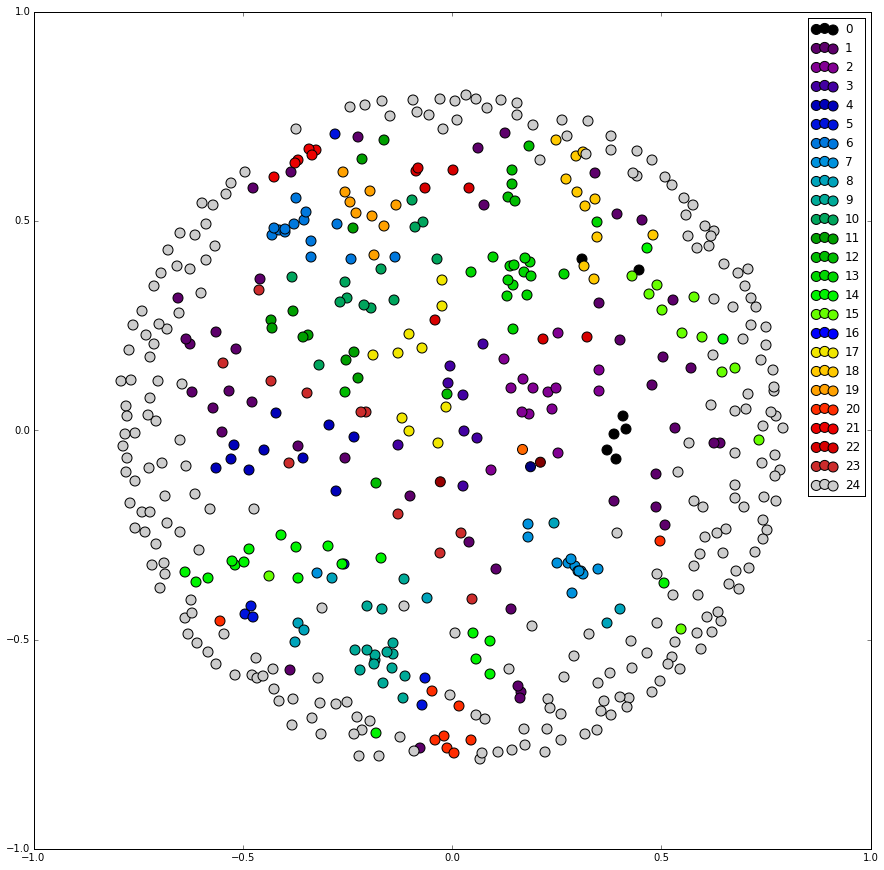

In [13]:
figure(figsize=(15,15))

x = np.arange(10)
yys = [i+x+(i*x)**2 for i in range(25)]
colors = cm.nipy_spectral(np.linspace(0, 1, 25))
#print colors[24]

#plt.scatter(xs,ys, c=k_fit, s=100)
for idx in range(0,25):
    plt.scatter(xs[numpy.where(k_fit==idx)], ys[numpy.where(k_fit==idx)], s=100, label=str(idx), c=colors[idx])
plt.legend()    
#print xs[numpy.where(k_fit==0)]
#colorbar()

In [14]:
import gensim
dic = gensim.corpora.Dictionary.load("/home/daniela/git/analyzing-corpora/data/data/filtered_0.1_5_1000000.dic")

In [15]:
len(dic)

175884

In [16]:
k_fit # which topic belongs to which cluster

array([17, 24, 24, 24, 21, 10, 24,  1, 24, 24, 24, 24, 24, 15, 24, 24, 16,
       24, 24,  1, 24, 24,  6,  1, 19, 24, 24, 11, 24, 24,  1, 24, 24,  7,
       24,  1, 13, 20, 14, 24, 24,  1, 24,  1, 24, 24, 10, 24, 24, 24,  3,
       24, 15, 24, 24, 24, 24,  4,  0, 10, 24, 14, 24, 21, 24, 24, 24, 24,
       24, 24, 24, 14,  1, 12, 23,  9, 24, 22, 24,  2, 24,  5, 24, 24,  9,
       18, 24,  6, 17,  3, 13,  2, 24, 14, 22,  1,  6, 13,  9,  3,  7, 14,
       19, 24, 23, 24, 11,  0, 10,  4,  7,  7,  2, 24, 10,  1, 24, 24, 24,
       24, 12, 24, 24,  1, 24,  8, 24, 24, 24,  5, 24, 24, 18, 24, 24, 24,
       19, 24, 24, 10, 15, 24, 24, 17, 13, 24, 24, 24, 20, 24, 24, 24, 11,
        1,  0, 24, 24, 24, 22, 24, 24, 24,  6, 14,  3, 24, 24, 24, 24, 24,
       24, 24, 24,  4, 23, 24, 21, 14,  1,  2, 24, 24, 24, 24, 24, 13,  1,
       24,  3, 24, 24,  1, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
        9, 14,  1,  1, 24, 24, 16, 13,  1,  6, 18, 13, 21,  6,  5, 14, 20,
       24,  7, 24, 24, 24

In [18]:
cluster_indices = [ numpy.where(k_fit==n) for n in range(0,25) ]
[n for n in cluster_indices[2][0]]
print cluster_indices[2][0]
topic_out = [topics[n] for n in cluster_indices[2][0]]
print numpy.shape(topic_out)
#print cluster_indices
#print numpy.shape(topics)
#topicsn = [ topics[cluster_indices[0][0][n] for n in range(0,len(cluster_indeces[0][0]))] ]
#print cluster_indices[0][0]
#print numpy.shape(cluster_indices)

[ 79  91 112 179 239 318 337 359 377 433 441 486 488 522]
(14, 175884)


In [19]:
def return_n_words(dic, topic, n_words):
  aa = [(dic[idx],topic[idx]) for idx in argsort(topic)[-n_words:] ]
  return dict(aa)

In [20]:
#topic_weights = []
#topic_weights = [ return_n_words(dic, topics[idx], 10) for idx in range(0,len(topics[0:3])) ]
topic_weights = [ return_n_words(dic, topic_out[idx], 10) for idx in range(0,len(topic_out[:])) ]

#return_n_words(dic, topics[0], 10)
topic_weights

[{u'access': 0.015420789395845612,
  u'click': 0.028560816116064092,
  u'free': 0.011570943612723955,
  u'image': 0.059292124136744027,
  u'internet': 0.010143774106690439,
  u'link': 0.01010742624204756,
  u'online': 0.014546301270147608,
  u'service': 0.012793382292183891,
  u'site': 0.013216850142644189,
  u'web': 0.013888436854050173},
 {u'access': 0.012637393311478803,
  u'address': 0.0085948782327767807,
  u'alias': 0.0089058647424407229,
  u'borland': 0.0086721545321331375,
  u'click': 0.023330990677266499,
  u'engine': 0.0094596460883774307,
  u'free': 0.0097958952055838058,
  u'online': 0.0087021382499371455,
  u'site': 0.0098355982065247878,
  u'web': 0.011048137700686581},
 {u'access': 0.024057918133379347,
  u'available': 0.013601464784501527,
  u'click': 0.01266753803936211,
  u'contact': 0.011304874658174159,
  u'internet': 0.017240959858831638,
  u'link': 0.013004848924567946,
  u'service': 0.017120926459144561,
  u'site': 0.02109335693179256,
  u'use': 0.011594383439542

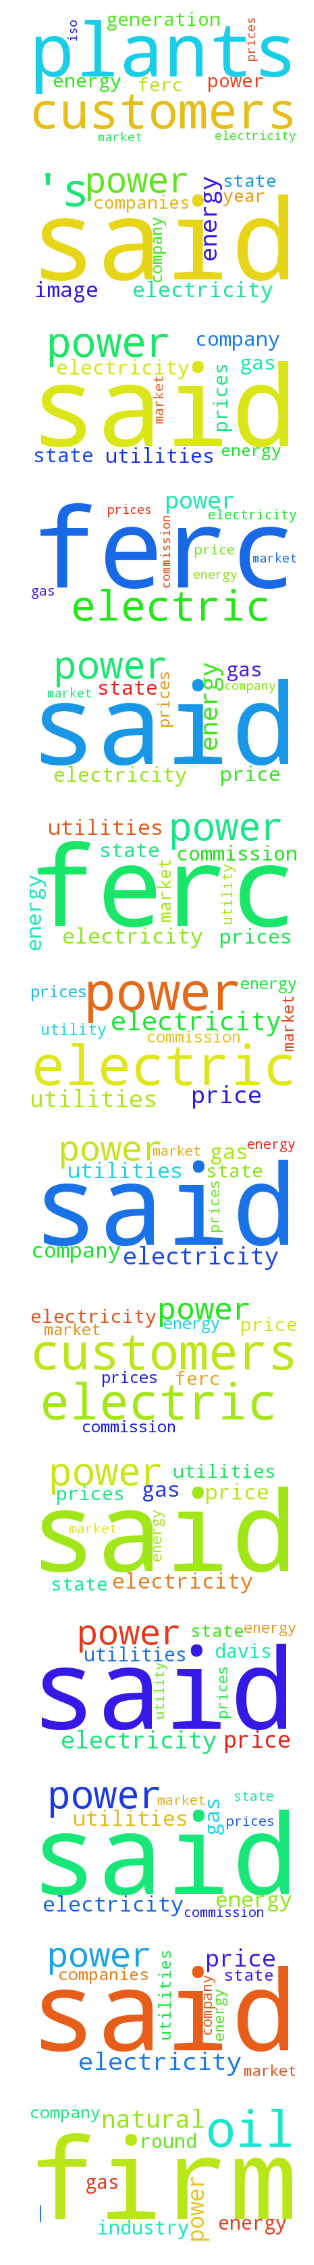

In [256]:
figure(figsize=(16,40))
for idx,topic in enumerate(topic_weights):
    wc = WordCloud(background_color="white")
    ww = [(word,weight) for word,weight in topic.iteritems()]
    img = wc.generate_from_frequencies(ww)
    subplot(len(topic_weights),2,2*idx+1)
    imshow(img)
    axis('off')
    
#    subplot(nTopics,2,2*idx+2)
#    plot(topicsByAge[:,idx])
#    axis([10, 100, 0, 1.0])
#    title('Topic #%2d'%(idx))

In [137]:
topic_weights

[{u'attempting': 0.0042718758508231685,
  u'contract': 0.0058957541343635737,
  u'contracts': 0.006844541819375544,
  u'cost': 0.0053567797397312137,
  u'due': 0.0052003480577177789,
  u'however': 0.0050988362354636371,
  u'month': 0.0042827824196166615,
  u'occurred': 0.0046752601120512525,
  u'rate': 0.0091070106692935013,
  u'term': 0.0043865895372844424},
 {u'>>>': 0.031348132495766991,
  u'allison': 0.041445466600460994,
  u'amanda': 0.027717540107928901,
  u'amazon': 0.021314509450177467,
  u'barreda/hou/ees@ees': 0.016042917947813828,
  u'follows': 0.3025403900014646,
  u'fran': 0.037564717893894317,
  u'fy': 0.014543514945314544,
  u'kopper': 0.015877213260706825,
  u'margo': 0.024191512980354345},
 {u'@': 0.03861033458784463,
  u'chris': 0.087313635790042032,
  u'eric': 0.049525833760854017,
  u'fw': 0.025234688300349951,
  u'h': 0.019141343332273505,
  u'joe': 0.098102570522967808,
  u'john': 0.13671271009850067,
  u'julie': 0.021790886432399455,
  u'robin': 0.021982231283148

In [112]:
"""
Finding the K in K-Means Clustering, with "The gap statistic" method
"""

import numpy
from random import uniform, random, choice, sample
def Wk(mu, clusters):
    K = len(mu)
    return sum([numpy.linalg.norm(mu[i]-c)**2/(2*len(c)) \
               for i in range(K) for c in clusters[i]])

def find_centers(X, K):
    # Initialize to K random centers
    oldmu = sample(X, K)
    mu = sample(X, K)
    while not has_converged(mu, oldmu):
        oldmu = mu
        # Assign all points in X to clusters
        clusters = cluster_points(X, mu)
        # Reevaluate centers
        mu = reevaluate_centers(oldmu, clusters)
    return(mu, clusters)

def cluster_points(X, mu):
    clusters  = {}
    for x in X:
        bestmukey = min([(i[0], numpy.linalg.norm(x-mu[i[0]])) \
                    for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(x)
        except KeyError:
            clusters[bestmukey] = [x]
    return clusters

def reevaluate_centers(mu, clusters):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        newmu.append(numpy.mean(clusters[k], axis = 0))
    return newmu

def has_converged(mu, oldmu):
    return (set([tuple(a) for a in mu]) == set([tuple(a) for a in oldmu]))


def init_board_gauss(N, k):
    n = float(N)/k
    X = []
    for i in range(k):
        c = (uniform(-1, 1), uniform(-1, 1))
        s = uniform(0.05,0.5)
        x = []
        while len(x) < n:
            a, b = numpy.array([numpy.random.normal(c[0], s), numpy.random.normal(c[1], s)])
            # Continue drawing points from the distribution in the range [-1,1]
            if abs(a) < 1 and abs(b) < 1:
                x.append([a,b])
        X.extend(x)
    X = numpy.array(X)[:N]
    return X

def bounding_box(X):
    xmin, xmax = min(X,key=lambda a:a[0])[0], max(X,key=lambda a:a[0])[0]
    ymin, ymax = min(X,key=lambda a:a[1])[1], max(X,key=lambda a:a[1])[1]
    return (xmin,xmax), (ymin,ymax)

def gap_statistic(X, ks_min, ks_max, ks_step):
    (xmin,xmax), (ymin,ymax) = bounding_box(X)
    # Dispersion for real distribution
    ks = range(ks_min,ks_max, ks_step)  # !! We span values of K from ks_min to ks_max using ks_step
    Wks = numpy.zeros(len(ks))
    Wkbs = numpy.zeros(len(ks))
    sk = numpy.zeros(len(ks))
    for indk, k in enumerate(ks):
        mu, clusters = find_centers(X,k)
        Wks[indk] = numpy.log(Wk(mu, clusters))
        # Create B reference datasets
        B = 10
        BWkbs = numpy.zeros(B)
        for i in range(B):
            Xb = []
            for n in range(len(X)):
                Xb.append([uniform(xmin,xmax),
                          uniform(ymin,ymax)])
            Xb = numpy.array(Xb)
            mu, clusters = find_centers(Xb,k)
            BWkbs[i] = numpy.log(Wk(mu, clusters))
        Wkbs[indk] = sum(BWkbs)/B
        sk[indk] = numpy.sqrt(sum((BWkbs-Wkbs[indk])**2)/B)
    sk = sk*numpy.sqrt(1+1/B)
    return(ks, Wks, Wkbs, sk)

In [113]:
shape(cos_distance)

(529, 529)

In [114]:
X = init_board_gauss(200,3)

In [115]:
X

array([[ 0.0875988 ,  0.01037455],
       [ 0.01710605,  0.11528361],
       [ 0.10063386,  0.2488135 ],
       [ 0.17887934,  0.24215319],
       [ 0.04703257,  0.35831808],
       [-0.16537516,  0.38631556],
       [ 0.04256978,  0.08666717],
       [-0.01503434,  0.29795303],
       [-0.03455398, -0.10850136],
       [ 0.19376858,  0.05591656],
       [ 0.14972244,  0.09114696],
       [ 0.04938609,  0.11376909],
       [ 0.21517103,  0.29614808],
       [ 0.11080528,  0.36811382],
       [ 0.14425557,  0.11224204],
       [-0.0310362 ,  0.08091197],
       [ 0.05230323,  0.20129447],
       [ 0.02728853,  0.29987474],
       [ 0.07125017,  0.09125316],
       [-0.12194087,  0.00460565],
       [ 0.03522398, -0.13196681],
       [ 0.15333435,  0.22895521],
       [ 0.06366601,  0.35230796],
       [ 0.03539462,  0.18954254],
       [-0.0990355 ,  0.25543352],
       [ 0.09346597,  0.23703548],
       [ 0.09122899,  0.10746935],
       [ 0.36865808,  0.08608267],
       [-0.06320001,

In [100]:
shape(X)

(200, 2)

In [101]:
shape(pos)

(529, 2)

In [ ]:
ks, logWks, logWkbs, sk = gap_statistic(pos, ks_min=1, ks_max=100, ks_step=10) # computationally intensive

In [104]:
ks

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [105]:
logWks

array([ 1.52924651,  1.43673028,  1.37366573,  1.25218612,  1.19592374,
        1.13061411,  1.06011984,  0.99563712,  0.918956  ,  0.84239343])

In [106]:
logWkbs

array([ 1.70034364,  1.62729789,  1.51008808,  1.41869526,  1.35132209,
        1.29466118,  1.21983272,  1.14161424,  1.10719993,  1.03285135])

In [107]:
sk

array([ 0.06743104,  0.03975569,  0.03275128,  0.03749849,  0.04299453,
        0.04118743,  0.04193019,  0.0455531 ,  0.03740218,  0.03337354])

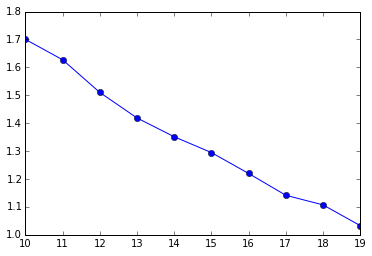

In [108]:
plt.plot(ks, logWkbs, marker='o')

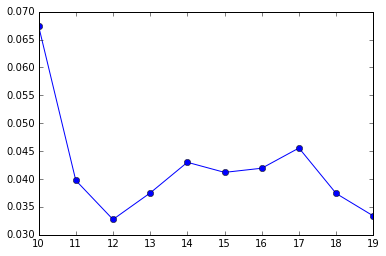

In [109]:
plt.plot(ks, sk, marker='o')

In [110]:
ks = range(5,10, 2)

In [111]:
ks

[5, 7, 9]